<a href="https://colab.research.google.com/github/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Redes Neurais

### Objetivos

  - Conhecer e praticar Redes Neurais Convolucionais
  - Conhecer uma intuição sobre Convolução, Pooling 
  - Praticar a classificação de objeto usando Keras/TensorFlow
  

## Redes Neurais Convolucionais

A Redes Neurais Convolucionais ou CNN (Convolutional Neural Network) ou até mesmo ConvNet, são redes neurais de aprendizado profundo, `Deep Learning` muito utilizadas na área de Visão Computacional `classificação`,`detecção de objetos` ou `segmentação semântica`.



### Diferença de MLP para CNN

- Em uma rede MLP, cada pixel é tratado de forma isolada, sem considerar os demais pixels, dificultando a caracterização de features mais complexas. Não é levado em consideração se o pixel está na borda ou centro da imagem. Em um CNN o processo de convolução leva em consideração esta condição. 

- Outro ponto importante está relacionado a quantidade de parâmetros para treinamento para uma imagem. Exemplo: uma imagem de 400x600 na escala de cinza e 100 neurônios na primeira camada. Parâmetros = (400x600*100 +100) = 24.000.100 de parâmetros para treinamento, apenas na primeira camada.


<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/flatten.png?raw=1" width="400p">

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Flatten(input_shape=(800,600)),
    layers.Dense(units=100)
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 480000)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               48000100  
                                                                 
Total params: 48,000,100
Trainable params: 48,000,100
Non-trainable params: 0
_________________________________________________________________


## Convolução

A **convolução**  permite uma **filtragem no domínio espacial**. Esse processo ocorre com a aplicação de **filtros** (pequenas matrizes), posicionadas sob cada pixel da imagem. Estes filtros, normalmente, são chamados de **kernels (ou núcleos)**. O resultado final do valor do pixel é calculado através de um **produto de convolução**.

Normalmente os **kernels** são matrizes 3x3. E os pesos são ajustados a cada iteração pelo **backpropagation**

Nesta imagem temos a imagem original em azul, o kernel em cinza varrendo a imagem e o resultado da convolução em verde. 

  <img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/same_padding_no_strides.gif?raw=1">
  <img src="https://raw.githubusercontent.com/arnaldojr/DisruptiveArchitectures/master/material/aulas/lab08/same_padding_no_strides.gif">



Vamos analizar o que acontece em apenas um pixel da imagem:

  <img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/convolution.png?raw=1">



O resultado para cada pixel é esse:

  <img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/conv3d.gif?raw=1">


O resultado em uma imagem é o seguinte: 

  <img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/convexp.png?raw=1">

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Conv2D(100, (3, 3), activation='relu', input_shape=(800,600, 3)),
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 798, 598, 100)     2800      
                                                                 
Total params: 2,800
Trainable params: 2,800
Non-trainable params: 0
_________________________________________________________________


## Pooling

A camada de `pooling` é semelhante a camada de convolução, mas a matriz de saída é uma redução da camada de entrada, por consequência a potência computacional diminui, além disso, é nesta etapa que são extraídas as característica `features` mais importantes da imagem. 

O pooling mais comum é utilizando um kernel 2x2, e um passo `stride` de 2, por consequência a imagem de saída terá a metade da imagem de entrada. A operação de pooling irá selecionar dentro da janela do kernel o valor que será aplicado na próxima camada, pode ser o maior valor `Maxpooling()` ou a média `AveragePooling()`

<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/pooling.png?raw=1">


<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/poolingexp.png?raw=1">

<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/convnet.png?raw=1">

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [5]:
# Importa o dataset Fashion Mnist
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#normaliza os dados para o pixel ficar com valores entre 0 e 1
train_images = train_images / 255.0
test_images = test_images / 255.0
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
train_images = train_images.reshape(-1,28,28,1)
print(train_images.shape)
test_images = test_images.reshape(-1,28,28,1)
test_images.shape

(60000, 28, 28, 1)


(10000, 28, 28, 1)

In [7]:
###### montar a arquitetura da rede neural 

from tensorflow.keras import layers

model = keras.Sequential([
    
    layers.Conv2D(5, (3,3), activation='relu', padding="same", input_shape=(28, 28,1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(10, activation='sigmoid')  ###### neuroniios especialistasss 
])


model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 5)         50        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 5)        0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 980)               0         
                                                                 
 dense_2 (Dense)             (None, 120)               117720    
                                                                 
 dense_3 (Dense)             (None, 10)                1210      
                                                                 
Total params: 118,980
Trainable params: 118,980
Non-trainable params: 0
________________________________________________

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs_hist = model.fit(train_images, train_labels, epochs=3)


Epoch 1/3
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4714 - accuracy: 0.8365
Epoch 2/3
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3395 - accuracy: 0.8780
Epoch 3/3
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2921 - accuracy: 0.8939


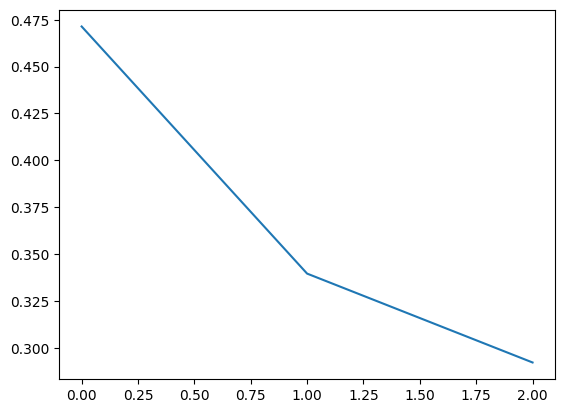

In [9]:
import pandas as pd

history_df = pd.DataFrame(epochs_hist.history)

history_df['loss'].plot();
#history_df['accuracy'].plot();


In [10]:
#Validadção
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


1875/1875 - 14s - loss: 0.2536 - accuracy: 0.9077 - 14s/epoch - 7ms/step
313/313 - 3s - loss: 0.3054 - accuracy: 0.8891 - 3s/epoch - 10ms/step


In [11]:
# Previsões com o modelo treinado

predictions = model.predict(test_images)

313/313 [==============================] - 2s 7ms/step


In [12]:
#Vericação dos itens preditos

item = 4000

print("\nClasse predita foi {} com {:2.0f}%. Classe correta é {}, {}.".format(np.argmax(predictions[item]), 
                                                                 100*np.max(predictions[item]),
                                                                 test_labels[item], 
                                                                 class_names[test_labels[item]]))

a=100*np.max(predictions[item])


Classe predita foi 0 com 99%. Classe correta é 0, T-shirt/top.


In [13]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

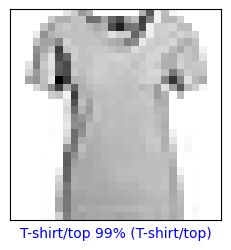

In [14]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(item, predictions, test_labels, test_images)
plt.show()

## Desafio1

Implemente uma rede LeNet-5.

A leNet-5 foi publicada por leCun em 1998. E é composta basicamente por:


<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/lenet.png?raw=1">


- Convolutional Layers (CONV);
- Pooling Layers (POOL);
- Fully-Connected Layers (FC).


Um exemplo de aplicação: https://github.com/gary30404/convolutional-neural-network-from-scratch-python


In [15]:
###### montar a arquitetura da rede neural 

from tensorflow.keras import layers
    
model = keras.Sequential([
    
    layers.Conv2D(60, (5,5), activation='relu', padding="same",  input_shape=(32,32,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(160, (5,5), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(16, (5,5), activation='relu'),
    layers.MaxPooling2D((2,2)),    
    layers.Conv2D(16, (5,5), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),  ###vetor
    layers.Dense(1420, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')  ###### neuroniios especialistasss 
])


model.summary()

ValueError: ignored

## Desafio 2 

Comente quais alterações você faria na rede LeNet-5?

Resposta: 





## Desafio 3 

Implemente a rede AlexNet:


<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/AlexNet-1.png?raw=1">


paper: https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

In [ ]:
### Implemente sua resposta 


###desafio3

from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu', input_shape=(227,227,3)),
    layers.MaxPool2D(pool_size=3, strides=2),
    layers.Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=3, strides=2),
    layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=3, strides=2),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)  
])

model.summary()
